<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/optimization/Profit_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#@title **Imports** { display-mode: "form" }
%%capture 
!pip install jaxopt 

import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
from jaxopt import Bisection
import jaxopt 
from functools import partial 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
from mpl_toolkits import mplot3d
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## **Problem Set-up**

- We can model firms as selecting the amount of each factor of production in order to maximize profit. 
- For example, let's assume that there are two factors of production which we denote by $(x_1, x_2)$
  - *Note, if you would like to make this more concrete you can think of $x_1$ as labor and $x_2$ as captial*
- Then we can represent the firm problem as follows:
  - $p$ denotes the price of the good 
  - $f$ denotes the production function 
  - $c$ denotes the cost function. 

\begin{align*}
\underset{x_1, x_2 \in \mathcal{R}_+ \times \mathcal{R}_+}{\textrm{maximize}} \ pf(x_1, x_2) - c(x_1, x_2)
\end{align*}



In [24]:
"""Example functions"""

def f(x1, x2): 
  """Production Function"""
  return 0.5*x1**0.5*x2**0.5 

def c(x1, x2):
  """Cost Function"""
  return 1.0*x1 + 1.5*x2 

def profit(p, x1, x2):
  return p*f(x1, x2) - c(x1, x2)

p = 5.0 

In [25]:
#@title **Graph of Profit Function** { display-mode: "form" }
xp=jnp.linspace(0., 10,50)  # N
yp=jnp.linspace(0., 10,50)  # M
X, Y = jnp.meshgrid(xp, yp)
Z = partial(profit, p)(X,Y)
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])

fig.update_layout(title='Profit Maximization', 
                  autosize=True)
fig.show()

# **Short-Run Profit Maximization**

- In the short run, by definition, a factor of production is fixed. 
We can represent this by partialy evaluating the profit function. 
- For example, let's say that in the short run $x_2 = 3$. Then the optimization problem becomes 

\begin{align*}
\underset{x_1 \in \mathcal{R}_+ }{\textrm{maximize}} \ pf(x_1, 3) - c(x_1, 3)
\end{align*}


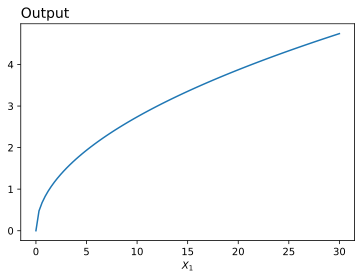

In [29]:
#@title **Graph of Short-Run Production Function** { display-mode: "form" }

short_run_f = partial(f, x2=3.0)
xs = jnp.linspace(0, 30, 100)
ys = jax.vmap(short_run_f)(xs)
plt.plot(xs, ys)
plt.title('Output', loc='left', size=14)
plt.xlabel(r'$X_1$')
plt.show()

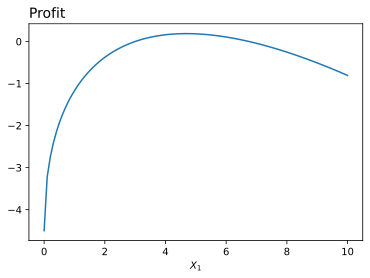

In [30]:
#@title **Graph of Short-Run Profit Function** { display-mode: "form" }

short_run_profit = partial(profit, p, x2=3.0)
xs = jnp.linspace(0, 10, 100)
ys = jax.vmap(short_run_profit)(xs)
plt.plot(xs, ys)
plt.title('Profit', loc='left', size=14)
plt.xlabel(r'$X_1$')
plt.show()